In [3]:
## Introduction : The goal of this project is to attempt to predict the type of physical activity(standing,walking,stairs up,stairs down)from tri-axial smartphone accelerometer data

## Input Data : The input data used for training in this project consists of two files. The first file, train_time_series.csv, contains the raw accelerometer data, which has been collected using the Beiwe research platform.
            # The second file, train_labels.csv, contains the activity labels, and you'll be using these labels to train your model. Different activities have been numbered with integers. We use the following encoding: 1 = standing, 2 = walking, 3 = stairs down, 4 = stairs up


## Steps : I first obtain the required training datasets by cleaning the provided data.I do this by reducing the data and then reshaping.
##         I then visualize the data to see relationships between various variables.
##.        Next I employ 6 models to verify which works well for my data
##.        I use my training datasets to train the best of the 6 models.
##         Finally I will predict the labels(the physical activity)


# Load libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import time



In [8]:
# Reading the train_time_series csv file
start_time = time.time()
data = pd.read_csv("train_time_series.csv")
data.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [13]:
# Reducing data to a form useful for analysis
# Describe data
data = data[["x","y","z"]]
data.head()
data.describe()


,x,y,z
count,3744.000000,3744.000000,3744.000000
mean,0.195821,-1.005256,0.084435
std,0.395698,0.451178,0.350817
min,-1.071152,-3.391312,-1.415390
25%,-0.021503,-1.148064,-0.068581
50%,0.161728,-0.958015,0.052116
75%,0.400677,-0.769691,0.203800
max,2.503098,0.321747,2.587173


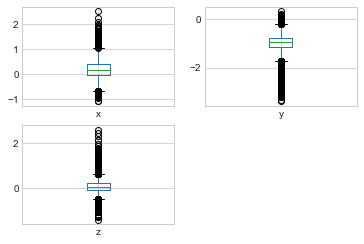

In [15]:
# Univariate plots to visualize individual datasets
# Visualize data with boxplot to identify normality
data.plot(kind = 'box', subplots = True, layout=(2,2), sharex=False, sharey = False)
plt.show()

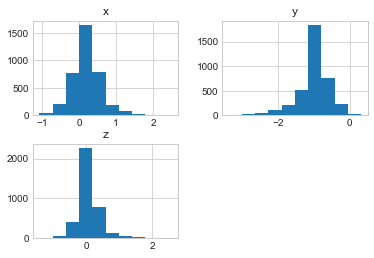

In [16]:
# Visualize with histogram
data.hist()
plt.show()
# It can be seen that x follows the gaussian distribution, whereas y and z are skewed

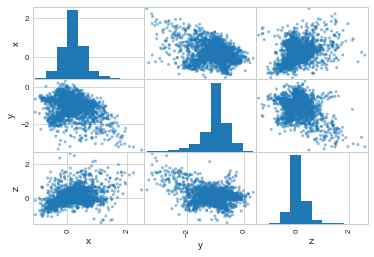

In [17]:
# Multivariate plots to visualize high correlations and predictable relationships.
scatter_matrix(data)
plt.show()

In [20]:
# Read the labels
labels = pd.read_csv("train_labels.csv")
labels.head()
labels = labels[["label"]]
labels.head()
labels.shape


(375, 1)

In [38]:
# Obtain x_train and y_train from data and labels respectively
# Clean data and labels datasets to ensure uniformity in length
data = pd.read_csv("train_time_series.csv", skiprows = [1,2,3,4]) # skip first 4 rows of data
data = data[["x","y","z"]]
data.shape
labels = pd.read_csv("train_labels.csv", skiprows = [1]) # skip first row of labels
X = data.values.reshape(-1,10,3)                         # Convert data to numpy array and reshape
Y = labels["label"].values.astype(int)                   # Convert labels to numpy array
print(X.shape,Y.shape)                                   # (374, 10, 3) (374,)
X_flatten = X.reshape(len(X),-1)                         # (374, 10, 3)->(374, 30)
print(X_flatten.shape, Y.shape)
x_train = X_flatten                                      # Training datasets
y_train = Y

(374, 10, 3) (374,)
(374, 30) (374,)


In [39]:
seed = 6
scoring = 'accuracy'


In [89]:
# Checking which model is best suited for the dataset
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GA', GaussianNB()))
models.append(('SVM', SVC()))
#models.append(('MP', StandardScaler (), SVC (gamma = "auto")))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = None)
    cv_results = model_selection.cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# SVC works better for the dataset


/Users/asare/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/asare/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

LR: 0.492532 (0.311320)
LDA: 0.502987 (0.280252)
KN: 0.558108 (0.226534)
CART: 0.510313 (0.170819)
GA: 0.507610 (0.175597)
SVM: 0.569417 (0.368966)


In [99]:
# Training the model with the x_train and y_train datasets
model = make_pipeline (StandardScaler (), SVC (gamma = "auto"))
model.fit (x_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [100]:
# Reading the x_test dataset
test_time_series = pd.read_csv("test_time_series.csv")
test_time_series.head()
#len(test_time_series)
x_test = test_time_series[["x", "y","z"]]            # Cleaning the dataset

#x_test = x_test.sample(125, replace=False)
x_test = x_test.values.reshape(-1,10,3)             # Reshaping x_test to get the desired shape
x_test = x_test.reshape(len(x_test),-1)
x_test.shape

(125, 30)

In [102]:
# Finding the predicted labels
# Determining the runtime
start_time = time.time()

pred_labels = model.predict(x_test)
pred_labels
print("The code runtime is %s seconds " % (time.time() - start_time))   # Running time in seconds




The code runtime is 0.005639791488647461 seconds 


In [97]:
# Saving the predicted labels as a csv file

pred_labels

np.savetxt('pred_labels.csv', [pred_labels], delimiter=',', fmt='%d', header = 'Predicted labels')
from numpy import genfromtxt
my_data = genfromtxt('pred_labels.csv', delimiter=',')  # verifying if pred_labels was saved right


In [ ]:
## Conclusion: The model I used had an acuracy of about 52% in predicting the physical activity.